# DiffuPath evaluation by Database

In [1]:
import os 

import matplotlib.pyplot as plt

import networkx as nx

import pybel
from pybel_tools.summary import plot_summary, count_top_centrality

from diffupy.process_network import process_kernel_from_file
from diffupy.utils import from_json, to_json

from diffupath.constants import DEFAULT_DIFFUPATH_DIR, ROOT_RESULTS_DIR
from diffupath.utils import reduce_dict_dimension

In [2]:
DEFAULT_DIFFUPATH_DIR

'/Users/josepmarin-llao/.diffupath'

In [3]:
ROOT_RESULTS_DIR

'/Users/Projects/MultiPath/Results'

## 1. PathMeUniverse graph and kernel import

##### Import graph

PathMe Universe v1.0.0
Number of Nodes: 42272
Number of Edges: 105871
Number of Citations: 7695
Number of Authors: 0
Network Density: 5.92E-05
Number of Components: 435
Number of Warnings: 0


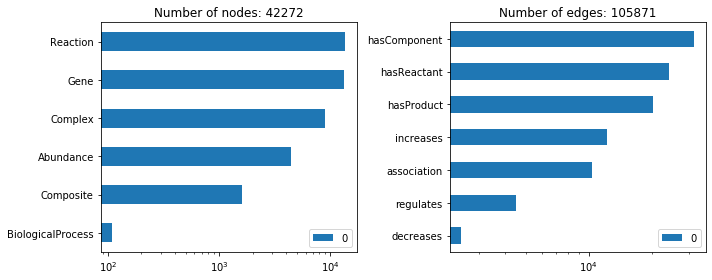

In [4]:
GRAPH_PATH = os.path.join(DEFAULT_DIFFUPATH_DIR, 'pickles', 'universe', 'pathme_universe_non_flatten_collapsed_names_no_isolates_16_03_2020.pickle')

pathme_universe_graph_no_flatten = pybel.from_pickle(GRAPH_PATH)
pathme_universe_graph_no_flatten.summarize()

nx.number_of_isolates(pathme_universe_graph_no_flatten)
pathme_universe_graph_no_flatten.remove_nodes_from({
    node
    for node in nx.isolates(pathme_universe_graph_no_flatten)
})

plot_summary(pathme_universe_graph_no_flatten, plt, figsize=(10, 4))
plt.show()

## 2. Load/import preprocessed datasets mapping 

##### Dataset 1

In [6]:
MAPPING_PATH_DATASET_1 = os.path.join(ROOT_RESULTS_DIR, 'data', 'input_mappings', 'dataset_1_mapping.json')

dataset1_mapping_by_database_and_entity = from_json(MAPPING_PATH_DATASET_1)

In [7]:
dataset1_mapping_by_database = reduce_dict_dimension(dataset1_mapping_by_database_and_entity)

dataset1_mapping_all_labels = {entity:entity_value for entity_type, entity_set in dataset1_mapping_by_database.items() for entity, entity_value in entity_set.items()}


In [8]:
dataset1_mapping_kegg = dataset1_mapping_by_database['kegg']

##### Dataset 2

In [9]:
MAPPING_PATH_DATASET2 = os.path.join(ROOT_RESULTS_DIR, 'data', 'input_mappings', 'dataset_2_mapping.json')

dataset2_mapping_by_database_and_entity = from_json(MAPPING_PATH_DATASET2)

In [10]:
dataset2_mapping_by_database = reduce_dict_dimension(dataset2_mapping_by_database_and_entity)

dataset2_mapping_all_labels = {entity:entity_value for entity_type, entity_set in dataset2_mapping_by_database.items() for entity, entity_value in entity_set.items()}

In [11]:
dataset2_mapping_kegg = dataset2_mapping_by_database['kegg']

##### Dataset 3

In [12]:
MAPPING_PATH_DATASET3 = os.path.join(ROOT_RESULTS_DIR, 'data', 'input_mappings', 'dataset_3_mapping.json')

dataset3_mapping_by_database_and_entity = from_json(MAPPING_PATH_DATASET3)

In [13]:
dataset3_mapping_by_database = reduce_dict_dimension(dataset3_mapping_by_database_and_entity)

dataset3_mapping_all_labels = {entity:entity_value for entity_type, entity_set in dataset3_mapping_by_database.items() for entity, entity_value in entity_set.items()}

In [14]:
dataset3_mapping_kegg = dataset3_mapping_by_database['kegg']

## 3. Evaluation: random cross-validation by method

In [3]:
from diffupath.views import show_sb_box_plot, preprocess_for_sb_boxplot, fdr_barchart_three_plot, preprocess_for_sb_ttest

from diffupath.cross_validation import cross_validation_by_method, get_p_values, get_wilcoxon_test

from collections import defaultdict

In [17]:
metrics_by_method['auroc']['Dataset 1'], metrics_by_method['auprc']['Dataset 1'] = cross_validation_by_method(dataset1_mapping_kegg, 
                                                                                                              kegg_pathme_graph_no_flatten, 
                                                                                                              kernel_kegg, 
                                                                                                              k = 3)

100%|██████████| 3/3 [00:41<00:00, 13.93s/it]


In [18]:
metrics_by_method['auroc']['Dataset 2'], metrics_by_method['auprc']['Dataset 2'] = cross_validation_by_method(dataset2_mapping_kegg, 
                                                                                                               kegg_pathme_graph_no_flatten, 
                                                                                                               kernel_kegg, 
                                                                                                               k = 3)

100%|██████████| 3/3 [00:40<00:00, 13.42s/it]


In [19]:
metrics_by_method['auroc']['Dataset 3'], metrics_by_method['auprc']['Dataset 3'] =  cross_validation_by_method(dataset3_mapping_kegg, 
                                                                                                               kegg_pathme_graph_no_flatten, 
                                                                                                               kernel_kegg, 
                                                                                                               k = 3)

100%|██████████| 3/3 [00:41<00:00, 13.77s/it]


### 3.1. Result metrics AUROC

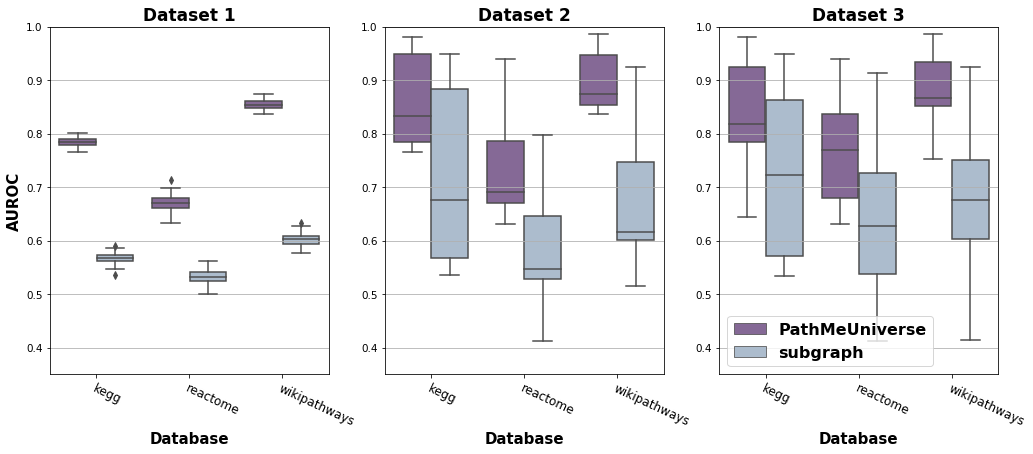

In [5]:
show_sb_box_plot(data_dict=preprocess_for_sb_boxplot(metrics_by_db['auroc']),
                 color_palette = ['#87619e', '#a6bcd3'],
                 x_label='Database',
                 y_label='AUROC',
                 y_lim = [0.35, 1]
                )


##### Wilcoxon test

In [6]:
df_wilcoxon = get_wilcoxon_test(preprocess_for_sb_ttest(metrics_by_db['auroc']), True, "AUROC")
df_wilcoxon.style.hide_index()

Dataset,Comparison AUROC,p_value,Significant difference
Dataset 1,"('kegg_on_PathMeUniverse', 'reactome_on_PathMeUniverse')",3.89656e-18,True
Dataset 1,"('kegg_on_PathMeUniverse', 'wikipathways_on_PathMeUniverse')",3.89656e-18,True
Dataset 1,"('kegg_on_PathMeUniverse', 'kegg_on_subgraph')",3.89656e-18,True
Dataset 1,"('kegg_on_PathMeUniverse', 'reactome_on_subgraph')",3.89656e-18,True
Dataset 1,"('kegg_on_PathMeUniverse', 'wikipathways_on_subgraph')",3.89656e-18,True
Dataset 1,"('reactome_on_PathMeUniverse', 'wikipathways_on_PathMeUniverse')",3.89656e-18,True
Dataset 1,"('reactome_on_PathMeUniverse', 'kegg_on_subgraph')",3.89656e-18,True
Dataset 1,"('reactome_on_PathMeUniverse', 'reactome_on_subgraph')",3.89656e-18,True
Dataset 1,"('reactome_on_PathMeUniverse', 'wikipathways_on_subgraph')",3.89656e-18,True
Dataset 1,"('wikipathways_on_PathMeUniverse', 'kegg_on_subgraph')",3.89656e-18,True


### 3.2. Result metrics AUPRC

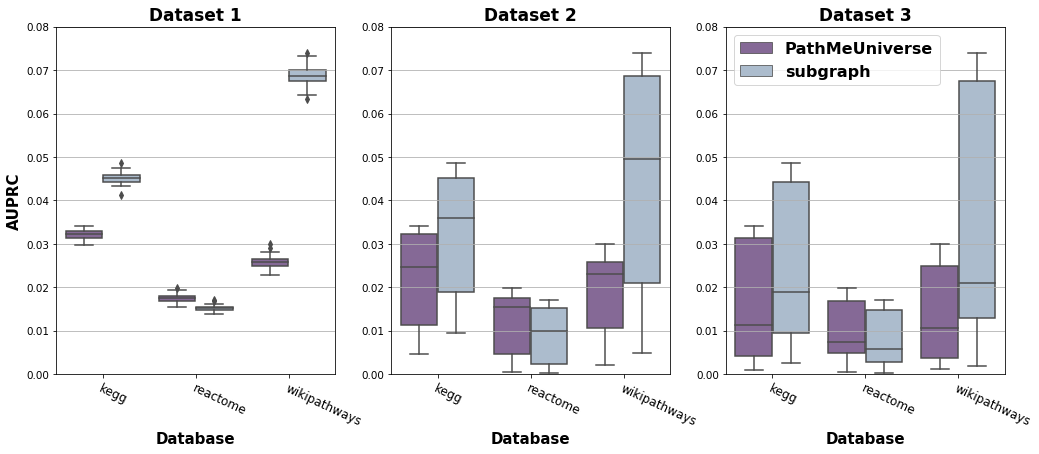

In [7]:
show_sb_box_plot(data_dict=preprocess_for_sb_boxplot(metrics_by_db['auprc']),
                 color_palette = ['#87619e', '#a6bcd3'],
                 x_label='Database',
                 y_label='AUPRC',
                 y_lim = [0, 0.08]
                )


##### Wilcoxon test

In [8]:
df_wilcoxon = get_wilcoxon_test(preprocess_for_sb_ttest(metrics_by_db['auprc']), 
                                True, 
                                "AUPRC")
df_wilcoxon.style.hide_index()

Dataset,Comparison AUPRC,p_value,Significant difference
Dataset 1,"('kegg_on_PathMeUniverse', 'reactome_on_PathMeUniverse')",3.89656e-18,True
Dataset 1,"('kegg_on_PathMeUniverse', 'wikipathways_on_PathMeUniverse')",3.89656e-18,True
Dataset 1,"('kegg_on_PathMeUniverse', 'kegg_on_subgraph')",3.89656e-18,True
Dataset 1,"('kegg_on_PathMeUniverse', 'reactome_on_subgraph')",3.89656e-18,True
Dataset 1,"('kegg_on_PathMeUniverse', 'wikipathways_on_subgraph')",3.89656e-18,True
Dataset 1,"('reactome_on_PathMeUniverse', 'wikipathways_on_PathMeUniverse')",3.89656e-18,True
Dataset 1,"('reactome_on_PathMeUniverse', 'kegg_on_subgraph')",3.89656e-18,True
Dataset 1,"('reactome_on_PathMeUniverse', 'reactome_on_subgraph')",3.89656e-18,True
Dataset 1,"('reactome_on_PathMeUniverse', 'wikipathways_on_subgraph')",3.89656e-18,True
Dataset 1,"('wikipathways_on_PathMeUniverse', 'kegg_on_subgraph')",3.89656e-18,True
